# Grundgerüst

Dieses `skeleton` soll einen guten Startpunkt geben.
Wir laden das `Data Set` und teilen es in `Training Set` und `Validation Set` auf.
Zudem schreiben wir eine `.csv` File im richtigen Format für Kaggle.
So kann man sich voll auf die Datenanalyse und das Erstellen von Modellen konzentrieren.

In [1]:
import pandas as pd
import numpy as np
import pickle

from collections import Counter

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

# Daten laden

Hier laden wir das `Data Set`.

In [3]:
# Load the data and split into features and labels
with open('../data/train.pkl', 'rb') as f:
    data_train = pickle.load(f)
X_data = data_train["images"]
y_data = data_train["labels"]

Es handelt sich um Bilddaten. Wir haben 50'000 RGB-Bilder mit je 32x32 Pixel und 3 Farbkanälen (RGB = Rot Grün Blau).

In [4]:
print(X_data.shape)

(50000, 32, 32, 3)


Wir können ein erstes Bild visualisieren:

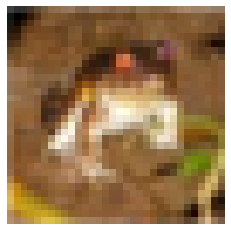

In [6]:
import matplotlib.pyplot as plt

img = X_data[0]

plt.imshow(img)
plt.axis('off')
plt.show()

Das Bild ist 32 Pixel breit, 32 Pixel hoch und besteht aus 3 Farbkanälen.

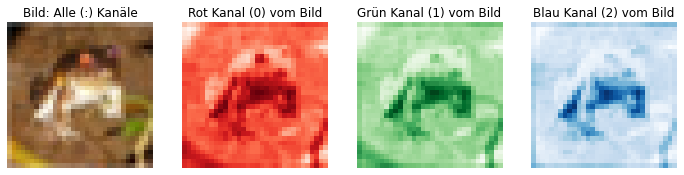

In [7]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 12 * 4))
axes[0].set_title('Bild: Alle (:) Kanäle')
axes[0].imshow(img[:, :, :])
axes[0].axis('off')
axes[1].set_title('Rot Kanal (0) vom Bild')
axes[1].imshow(img[:, :, 0], cmap='Reds')
axes[1].axis('off')
axes[2].set_title('Grün Kanal (1) vom Bild')
axes[2].imshow(img[:, :, 1], cmap='Greens')
axes[2].axis('off')
axes[3].set_title('Blau Kanal (2) vom Bild')
axes[3].imshow(img[:, :, 2], cmap='Blues')
axes[3].axis('off')
plt.show()

Wir teilen das `Data Set` in `Training Set` und `Validation Set` auf.

In [8]:
# Split features and labels into train (X_train, y_train) and validation set (X_val, y_val).
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=42)

# Datenanalyse

Wir empfehlen Ihnen, immer mit der Datenanalyse zu beginnen, um die Daten besser zu verstehen.
Bei Bilddaten macht es immer Sinn die Bilder zu visualisieren, beispielsweise mittels `matplotlib.pyplot.imshow`.
Es macht auch immer Sinn sich einige Beispiele aller Klassen anzuschauen, um ein Gefühl dafür zu bekommen, um was für Bilder es sich handelt. Sind die Katzen beispielsweise nur frontal aufgenommen oder gibt es diverse Perspektiven.
Anschliessend kann man noch die Verteilungen der Klasse überprüfen und die Farbkanäle pro Klasse betrachten.

In [9]:
# TODO: Do you data analysis here

# Modell trainieren
Nach der Datenanalyse sind wir bereit, ein Modell zu trainieren. Wir empfehlen, mit einem sehr einfachen Modell zu beginnen. Komplexere können wir später ausprobieren.

Versuchen Sie es beispielsweise mit einer `Logistic Regression`.

In [8]:
# TODO: Define and train your model here

# Modell evaluieren

Nachdem wir unser Modell trainiert haben, werden wir es auf dem `Validation Set` evaluieren. Beachten Sie, dass wir mit einer Klassifizierungseinstellung für mehrere Klassen arbeiten. Geeignete Metriken für die Mehrklassenklassifizierung sind beispielsweise Genauigkeit, Präzision, Recall oder F1-Score. Sie können alle aus sklearn importiert werden.

Es empfiehlt sich, Ihr erstes Ergebnis mit einer einfachen `Baseline` zu vergleichen.
In einem Klassifikationsfall ist es sinnvoll als `Baseline` immer die Majoritätsklasse (häufigste Klasse) in den Trainingsdaten vorherzusagen. Auch ein zufälliges Modell wäre eine mögliche `Baseline`.
In diesem Fall, da wir ausgeglichene Klassen und 10 Klassen haben, erreicht die `Baseline` eine Genauigkeit von ungefähr 10%.

In [10]:
counts = Counter(y_train.flatten())
mode = counts.most_common()[0][0]
print(mode)

deer


In [11]:
y_val_pred = np.repeat(mode, y_val.shape[0])
accuracy_score(y_true=y_val, y_pred=y_val_pred)

0.09456

# Anwendung des Modells auf dem `Test Set`

Wenn wir mit der Leistung unseres Modells auf dem `Validation Set` zufrieden sind, können wir es auf das `Test Set` anwenden.

In [12]:
with open('../data/test.pkl', 'rb') as f:
    X_test = pickle.load(f)

In [13]:
y_test_pred = np.repeat(mode, X_test.shape[0])
y_test_pred_df = pd.DataFrame(y_test_pred, columns=['label'])
print(y_test_pred_df.shape)

(10000, 1)


Um die Vorhersagen an Kaggle zu senden, schreiben wir sie in eine .csv-Datei, die Sie manuell übermitteln können.

In [15]:
y_test_pred_df.to_csv('../out/train_mode_submission.csv', header=True, index_label='id')